Exercise 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_score, GridSearchCV

In [2]:
mnist = fetch_openml('mnist_784', version=1)

c:\Users\Marcos\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [8]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist['data'], mnist['target']
X = np.array(X)
y = np.array(y)

In [42]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [5]:
kn_clf = KNeighborsClassifier()

In [22]:
cross_val_score(kn_clf, X_train, y_train, cv=3)

array([0.9676 , 0.9671 , 0.96755])

In [23]:
kn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
kn_clf.predict([X_train[0]])

array(['5'], dtype=object)

In [28]:
y_test_pred = kn_clf.predict(X_test)

In [29]:
accuracy_score(y_test, y_test_pred)

0.9688

In [30]:
y_train_pred = kn_clf.predict(X_train)
accuracy_score(y_train, y_train_pred)

0.9819166666666667

In [32]:
kn_clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [6]:
param_grid = [{'weights':['uniform', 'distance'], 'n_neighbors':[3,4,5]}]

grid_search_kn = GridSearchCV(kn_clf, param_grid, cv=2, scoring='accuracy')

In [7]:
grid_search_kn.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             scoring='accuracy')

In [8]:
grid_search_kn.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [9]:
kn_best_clf = grid_search_kn.best_estimator_

In [10]:
y_test_pred = kn_best_clf.predict(X_test)

In [11]:
accuracy_score(y_test, y_test_pred)

0.9714

Exercise 2

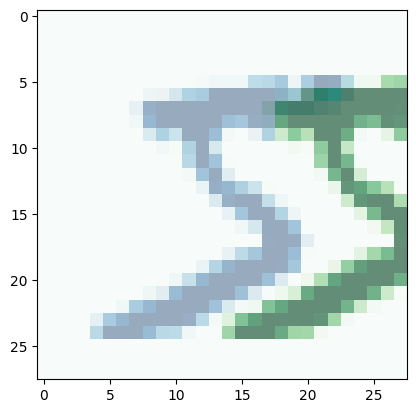

In [8]:
from scipy.ndimage import shift

img = np.reshape(X[0], (28,28))
plt.imshow(img, cmap=plt.cm.Blues)
plt.imshow(shift(img, [0,10], cval=0), cmap=plt.cm.Greens, alpha=0.6)
plt.show()

In [18]:
X_train[0].reshape(1,-1)[0].shape

(784,)

In [23]:
def img_shift(X_i, direction):
    from scipy.ndimage import shift

    img = X_i.reshape((28,28))
    direc_dict = {'up':[1,0], 'down':[-1,0], 'left':[0,-1], 'right':[0,1]}
    a,b = direc_dict[direction]
    new_img = shift(img, [a,b])
    X_new_i = new_img.reshape((1,-1))[0]
    return X_new_i

def img_augmentation(X_, y_):
    directions = ['up','down','left','right']
    
    m,n = X_.shape
    X_new, y_new = [],[]
    for i in range(m):
        x = X_[i]
        y = y_[i]
        X_new.append(x)
        y_new.append(y)

        for d in directions:
            x_new = img_shift(x, d)
            X_new.append(x_new)
            y_new.append(y)
    
    X_new = np.array(X_new, dtype=float)
    y_new = np.array(y_new, dtype=float)
    return X_new, y_new

In [28]:
X_train_new, y_train_new = img_augmentation(X_train, y_train)

In [31]:
print(X_train.shape)
print(X_train_new.shape)
print(y_train_new.shape)

(60000, 784)
(300000, 784)
(300000,)


In [55]:
kn_best_clf = KNeighborsClassifier(n_neighbors=4, weights='distance')

In [56]:
kn_best_clf.fit(X_train_new, y_train_new)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [57]:
y_aug_pred = kn_clf.predict(X_test)

In [58]:
y_aug_pred_str = np.array([','.join(item) for item in y_aug_pred.astype(int).astype(str)], dtype=object)
y_aug_pred_str

array(['7', '2', '1', ..., '4', '5', '6'], dtype=object)

In [59]:
y_test

array(['7', '2', '1', ..., '4', '5', '6'], dtype=object)

In [60]:
accuracy_score(y_test, y_aug_pred_str)

0.9754

Exercise 3 in the titanic notebook.